# Introduction

In [2]:
# word2vec with gensim 
from gensim.models import word2vec

In [37]:
model = word2vec.Word2Vec.load('word2vec/w2v_1760_1900/w2v_words.model')

In [38]:
# word embedding operates as a dictionary 
# mapping word types to vectors
model.wv['machine']

array([ 1.71968445e-01,  2.70484746e-01, -1.84552312e-01,  5.00591397e-01,
        1.52515754e-01, -3.04825813e-01,  3.41397136e-01,  8.93739238e-02,
        2.15603769e-01, -5.89485288e-01,  3.80043089e-01,  3.20834965e-01,
       -4.16698493e-02,  2.91256189e-01, -6.85506687e-03, -2.66951948e-01,
        1.46018133e-01, -2.68793672e-01, -1.89494625e-01,  2.62099326e-01,
       -4.62571204e-01, -8.92755166e-02,  1.57749817e-01,  4.91030663e-01,
        2.02094316e-01,  1.10610612e-01, -5.17635271e-02,  1.07864335e-01,
       -1.10338539e-01, -8.71941000e-02,  8.39515030e-03,  5.07728994e-01,
        1.42195327e-02,  2.91566312e-01,  2.94971198e-01, -4.17190313e-01,
        1.42062679e-01, -7.54840448e-02, -1.00778729e-01, -2.35880628e-01,
       -1.30309597e-01, -6.77567720e-01,  4.00120281e-02, -2.16521487e-01,
       -1.40804043e-02, -1.97626427e-01, -1.58942789e-01, -7.01520145e-02,
        8.68177190e-02,  3.22213233e-01, -2.10217535e-01, -4.64077890e-01,
        2.60877341e-01,  

In [73]:
model.wv['machine'].shape

(300,)

In [39]:
# closest neighbours are semantically related
# capture semantics of the 19th century
model.wv.most_similar('machine',topn=5)

[('machines', 0.7792686820030212),
 ('machinery', 0.7629484534263611),
 ('engine', 0.727625846862793),
 ('steam-engine', 0.7088614702224731),
 ('engines', 0.6519815921783447)]

In [40]:
# mouse only the animale
model.wv.most_similar('mouse',topn=5)

[('cat', 0.687270998954773),
 ('rat', 0.6613649129867554),
 ('kitten', 0.6363716125488281),
 ('weasel', 0.6303430199623108),
 ('rabbit', 0.6288489699363708)]

In [41]:
# no computers in victorian times
model.wv.most_similar('obama',topn=5)

KeyError: "word 'obama' not in vocabulary"

In [42]:
# neighbours aren't synomyms
model.wv.most_similar('good',topn=5)

[('o-ood', 0.7202963829040527),
 ('bad', 0.6890184879302979),
 ('-good', 0.6854113936424255),
 ('gooel', 0.6735956072807312),
 ('gcod', 0.6525894403457642)]

In [70]:
# similarity of vectors as proxy for semantic similarity
model.wv.similarity('apple','pear')

0.56899637

In [72]:
# similarity of vectors as proxy for semantic similarity
model.wv.similarity('copenhagen','brussels')

0.51745087

In [71]:
model.wv.similarity('apple','cat')

0.26883927

In [45]:
# gensim makes stuff easier, e.g. analogy
# but king - man + woman = king
# https://blog.esciencecenter.nl/king-man-woman-king-9a7fd2935a85
vector = model.wv['king'] - model.wv['man'] + model.wv['woman']
model.wv.similar_by_vector(vector)

[('king', 0.8062673211097717),
 ('queen', 0.6702409386634827),
 ('kiug', 0.6366063356399536),
 ('monarch', 0.6056570410728455),
 ('princess', 0.60062575340271),
 ('queeu', 0.5769879817962646),
 ('empress', 0.5722749829292297),
 ('kingof', 0.5720665454864502),
 ('kidg', 0.5620586276054382),
 ('kino-', 0.5597679615020752)]

# Bias 

In [46]:
%matplotlib inline
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
sns.set()

In [47]:
v1,v2 = [.5,.9], [.1,.8]
average_vector = list(np.mean([v1,v2],axis=0))
average_vector

[0.3, 0.8500000000000001]

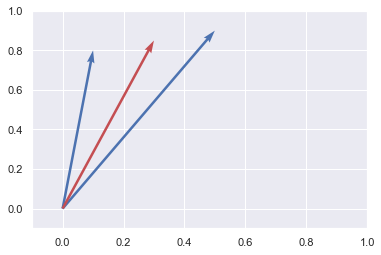

In [48]:
# plot the average vector
soa = np.array([[0, 0]+v1, [0, 0]+v2,[0, 0]+average_vector])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color=['b','b','r'],scale=1)
ax.set_xlim([-.1, 1])
ax.set_ylim([-.1, 1])
plt.draw()
plt.show()

In [49]:
# normalize vectors
model.init_sims(replace=True)

In [50]:
female_words = ['woman','women','mother','mothers','girl','girls']
male_words = ['man','men','father','fathers','boy','boys']

In [51]:
V_female = np.mean([model.wv[w] for w in female_words],axis=0)
V_male = np.mean([model.wv[w] for w in male_words],axis=0)

In [67]:
target_word = 'nurse'
print('distance to V_female',np.linalg.norm(V_female-model.wv[target_word]))
print('distance to V_male',np.linalg.norm(V_male-model.wv[target_word]))

distance to V_female 0.7930335
distance to V_male 0.848858


In [69]:
# compute bias
f = np.linalg.norm(V_female-model.wv[target_word])
m = np.linalg.norm(V_male-model.wv[target_word])
# negative scores biased towards women (distance to m > distance to f)
# positive scores biased towards men (distance to f > distance to m)
f - m

-0.05582452